In [46]:
# XGBoost model!!!!
# Import all the libraries and dependencies required
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta

from minisom import MiniSom
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load data into a pandas dataframe
df = pd.read_csv("../FINAL/Binance_ETHUSDT_day.csv")
df.head()

,Unix,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USDT,tradecount
0,1681689600000,2023-04-17,ETHUSDT,2118.66,2120.51,2056.25,2074.00,426972.7071,8.894333e+08,674817
1,1681603200000,2023-04-16,ETHUSDT,2090.61,2141.54,2072.72,2118.67,319880.4393,6.730346e+08,529231
2,1681516800000,2023-04-15,ETHUSDT,2099.99,2111.85,2071.13,2090.60,321823.7851,6.742609e+08,505299
3,1681430400000,2023-04-14,ETHUSDT,2012.00,2128.76,2009.22,2099.99,896307.3934,1.877720e+09,1182309
4,1681257600000,2023-04-12,ETHUSDT,1889.86,1933.00,1852.65,1917.39,630844.4186,1.195664e+09,801456


# DATASET PRE-PROCESSING

In [5]:
# Filter DataFrame to include rows from 2021 onwards
df_2021_to_2023 = df[df['Date'] >= '2017']
df.head()

,Unix,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USDT,tradecount
0,1681689600000,2023-04-17,ETHUSDT,2118.66,2120.51,2056.25,2074.00,426972.7071,8.894333e+08,674817
1,1681603200000,2023-04-16,ETHUSDT,2090.61,2141.54,2072.72,2118.67,319880.4393,6.730346e+08,529231
2,1681516800000,2023-04-15,ETHUSDT,2099.99,2111.85,2071.13,2090.60,321823.7851,6.742609e+08,505299
3,1681430400000,2023-04-14,ETHUSDT,2012.00,2128.76,2009.22,2099.99,896307.3934,1.877720e+09,1182309
4,1681257600000,2023-04-12,ETHUSDT,1889.86,1933.00,1852.65,1917.39,630844.4186,1.195664e+09,801456


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.tail()

,Unix,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USDT,tradecount
2064,1503273600000,2017-08-21,ETHUSDT,299.10,346.52,294.60,323.29,5219.44542,1.689472e+06,3925
2065,1503187200000,2017-08-20,ETHUSDT,289.41,300.53,282.85,299.10,2510.13871,7.428479e+05,2038
2066,1503100800000,2017-08-19,ETHUSDT,293.31,299.90,278.00,290.91,2146.19773,6.200226e+05,1795
2067,1503014400000,2017-08-18,ETHUSDT,302.00,311.79,283.94,293.96,9537.84646,2.858947e+06,5658
2068,1502928000000,2017-08-17,ETHUSDT,301.13,312.18,298.00,302.00,7030.71034,2.154655e+06,4522


In [ ]:
# Set the 'Date' column as the DataFrame index
df.set_index('Date', inplace=True)

In [11]:
df.head()

,Unix,Symbol,Open,High,Low,Close,Volume ETH,Volume USDT,tradecount
Date,,,,,,,,,
2023-04-17,1681689600000,ETHUSDT,2118.66,2120.51,2056.25,2074.00,426972.7071,8.894333e+08,674817
2023-04-16,1681603200000,ETHUSDT,2090.61,2141.54,2072.72,2118.67,319880.4393,6.730346e+08,529231
2023-04-15,1681516800000,ETHUSDT,2099.99,2111.85,2071.13,2090.60,321823.7851,6.742609e+08,505299
2023-04-14,1681430400000,ETHUSDT,2012.00,2128.76,2009.22,2099.99,896307.3934,1.877720e+09,1182309
2023-04-12,1681257600000,ETHUSDT,1889.86,1933.00,1852.65,1917.39,630844.4186,1.195664e+09,801456


In [12]:
# Resample the DataFrame to fill any missing dates
df = df.resample('D').ffill()

In [15]:
df.tail(7)


,Unix,Symbol,Open,High,Low,Close,Volume ETH,Volume USDT,tradecount
Date,,,,,,,,,
2023-04-11,1681171200000,ETHUSDT,1910.21,1937.37,1881.11,1889.86,405203.4892,7.743897e+08,590527
2023-04-12,1681257600000,ETHUSDT,1889.86,1933.00,1852.65,1917.39,630844.4186,1.195664e+09,801456
2023-04-13,1681257600000,ETHUSDT,1889.86,1933.00,1852.65,1917.39,630844.4186,1.195664e+09,801456
2023-04-14,1681430400000,ETHUSDT,2012.00,2128.76,2009.22,2099.99,896307.3934,1.877720e+09,1182309
2023-04-15,1681516800000,ETHUSDT,2099.99,2111.85,2071.13,2090.60,321823.7851,6.742609e+08,505299
2023-04-16,1681603200000,ETHUSDT,2090.61,2141.54,2072.72,2118.67,319880.4393,6.730346e+08,529231
2023-04-17,1681689600000,ETHUSDT,2118.66,2120.51,2056.25,2074.00,426972.7071,8.894333e+08,674817


In [16]:
# Dropping columns which are not required in analysis
df.drop(['Unix', 'Symbol', 'tradecount'], axis=1, inplace=True)
df.head()

,Open,High,Low,Close,Volume ETH,Volume USDT
Date,,,,,,
2017-08-17,301.13,312.18,298.00,302.00,7030.71034,2.154655e+06
2017-08-18,302.00,311.79,283.94,293.96,9537.84646,2.858947e+06
2017-08-19,293.31,299.90,278.00,290.91,2146.19773,6.200226e+05
2017-08-20,289.41,300.53,282.85,299.10,2510.13871,7.428479e+05
2017-08-21,299.10,346.52,294.60,323.29,5219.44542,1.689472e+06


# TRAIN-TEST SPLITING

In [17]:
X = df.drop('Close', axis=1)
y = df['Close']

In [18]:
X.head()

,Open,High,Low,Volume ETH,Volume USDT
Date,,,,,
2017-08-17,301.13,312.18,298.00,7030.71034,2.154655e+06
2017-08-18,302.00,311.79,283.94,9537.84646,2.858947e+06
2017-08-19,293.31,299.90,278.00,2146.19773,6.200226e+05
2017-08-20,289.41,300.53,282.85,2510.13871,7.428479e+05
2017-08-21,299.10,346.52,294.60,5219.44542,1.689472e+06


In [19]:
y.head()

Date
2017-08-17    302.00
2017-08-18    293.96
2017-08-19    290.91
2017-08-20    299.10
2017-08-21    323.29
Freq: D, Name: Close, dtype: float64

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False)


In [24]:
X_train.shape, X_test.shape, y_train.shape , y_test.shape


((1656, 5), (414, 5), (1656,), (414,))

In [25]:
# Creating XGBoost train and test data
dtrain = xgb.DMatrix(X_train.values, label=y_train.values)
dtest = xgb.DMatrix(X_test.values, label=y_test.values)


In [30]:
dtrain, dtest

(<xgboost.core.DMatrix at 0x159bb476990>,
 <xgboost.core.DMatrix at 0x159bad719d0>)

# TRAIN MODEL

In [175]:
# Defining hyperparameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.1,
    'max_depth': 9,
    'subsample': 0.6,
    'colsample_bytree': 0.6,
    'verbosity': 0
}

# Training the XGBoost model
num_round = 1000
xgb_model = xgb.train(params, dtrain, num_round)


# PREDICTING ON TESTING

In [176]:
# Perform prediction
prediction = xgb_model.predict(dtest)


In [158]:
prediction


array([2713.907 , 3036.4795, 2996.8035, 2866.497 , 2613.8516, 2673.256 ,
       2646.926 , 2534.6177, 2547.5005, 2620.6687, 2590.4392, 2634.1719,
       2539.829 , 2544.81  , 2540.336 , 2633.1028, 2724.6885, 2800.415 ,
       2883.9517, 2917.2231, 2890.8628, 2949.9585, 3055.5396, 3007.2048,
       3043.7073, 3230.595 , 3104.586 , 3251.5703, 3386.9448, 3458.5588,
       3368.608 , 3342.4116, 3365.7363, 3475.8804, 3508.2598, 3493.8416,
       3488.3345, 3176.3533, 3208.5   , 3270.4148, 3239.532 , 3291.1018,
       3091.815 , 3041.828 , 3034.8042, 3028.625 , 3051.3574, 3038.974 ,
       3003.3489, 2999.687 , 3062.9307, 3074.6062, 3054.9873, 2942.6672,
       2917.0015, 2943.8743, 2944.2468, 2835.5925, 2815.3545, 2950.178 ,
       2800.2957, 2787.7827, 2803.9778, 2785.1658, 2811.891 , 2872.6519,
       2863.3582, 2645.305 , 2678.1616, 2580.145 , 2366.545 , 2297.7583,
       2321.2942, 1932.3093, 2145.9363, 2046.2839, 2091.0962, 2057.609 ,
       2061.6306, 1951.4646, 1958.0679, 1960.004 , 

In [141]:
y_test_transformed = y_test.values
y_test_transformed


array([2920.95, 2976.33, 2947.3 , 2833.99, 2622.1 , 2665.15, 2551.29,
       2491.12, 2575.97, 2726.98, 2606.7 , 2556.86, 2568.8 , 2515.65,
       2589.41, 2617.73, 2773.81, 2811.92, 2938.92, 2950.84, 2861.38,
       2890.03, 2969.64, 3036.  , 3110.76, 3102.14, 3145.  , 3295.65,
       3332.92, 3400.51, 3385.79, 3281.51, 3455.21, 3443.77, 3521.91,
       3519.5 , 3406.99, 3168.51, 3227.19, 3192.39, 3258.57, 3203.04,
       2979.74, 3027.66, 3118.28, 3021.98, 3040.56, 3059.3 , 2988.06,
       3055.56, 3101.77, 3076.04, 2983.58, 2962.39, 2933.03, 2921.  ,
       3006.62, 2809.67, 2888.96, 2936.93, 2817.13, 2726.66, 2824.81,
       2856.54, 2781.7 , 2940.64, 2747.97, 2692.85, 2635.34, 2519.71,
       2228.55, 2342.05, 2084.99, 1960.22, 2009.69, 2056.48, 2145.29,
       2023.66, 2090.72, 1915.11, 2019.55, 1959.08, 1975.07, 2043.19,
       1973.32, 1979.41, 1942.63, 1792.23, 1727.27, 1792.22, 1813.64,
       1998.78, 1941.9 , 1817.95, 1834.08, 1775.12, 1804.58, 1806.23,
       1859.84, 1813

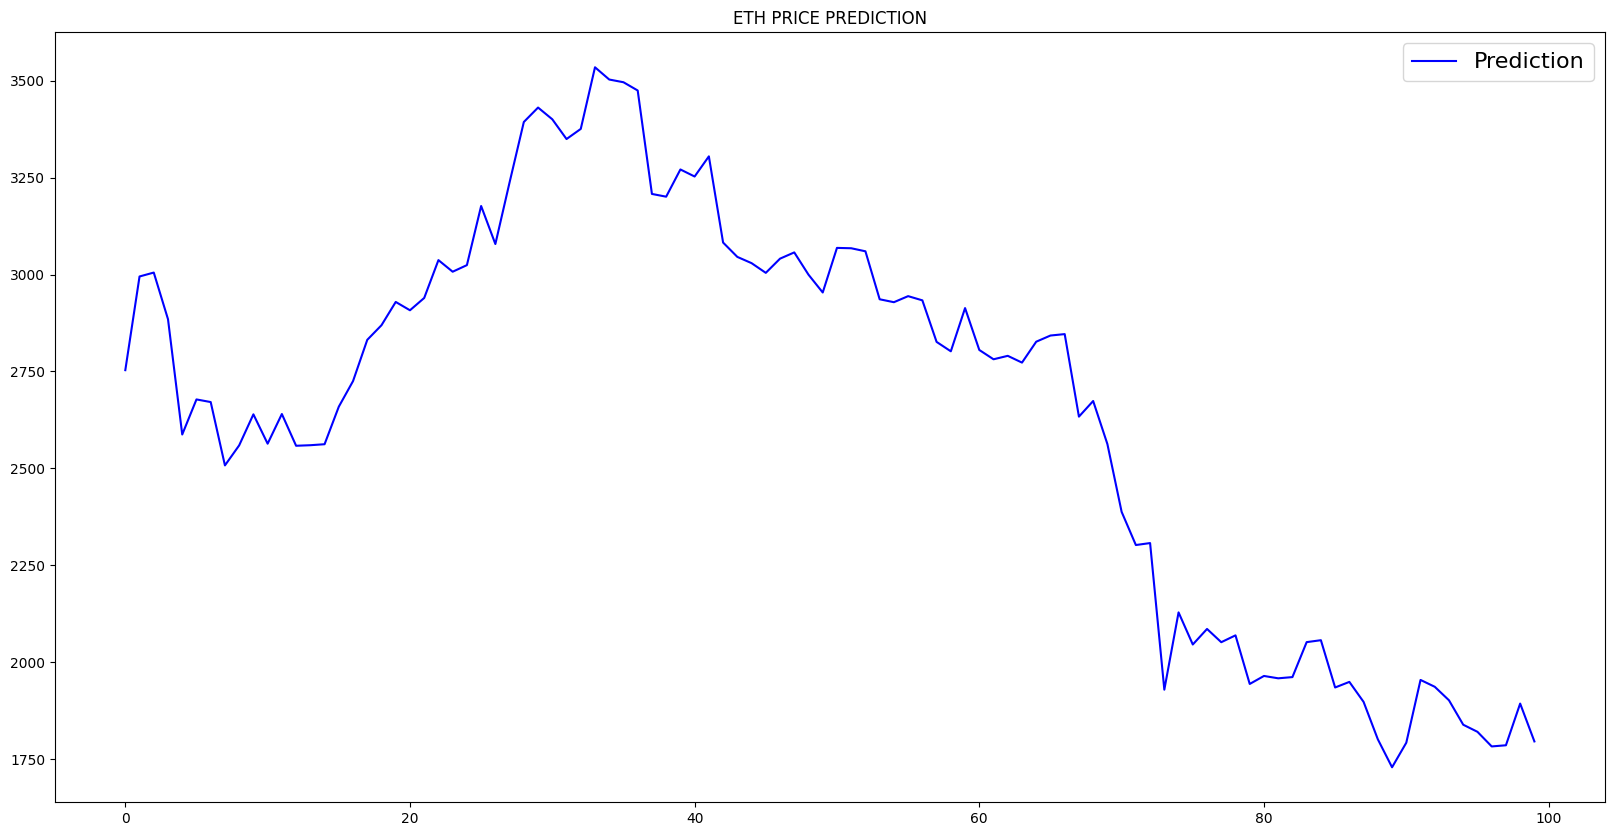

In [132]:
plt.figure(figsize=(20, 10))
plt.plot(prediction[:100], color= 'blue', label = 'Prediction')
# plt.plot(y_test, color='red', label='Prediction')
plt.title('ETH PRICE PREDICTION')
plt.legend(loc='best', fontsize=16)
plt.show()


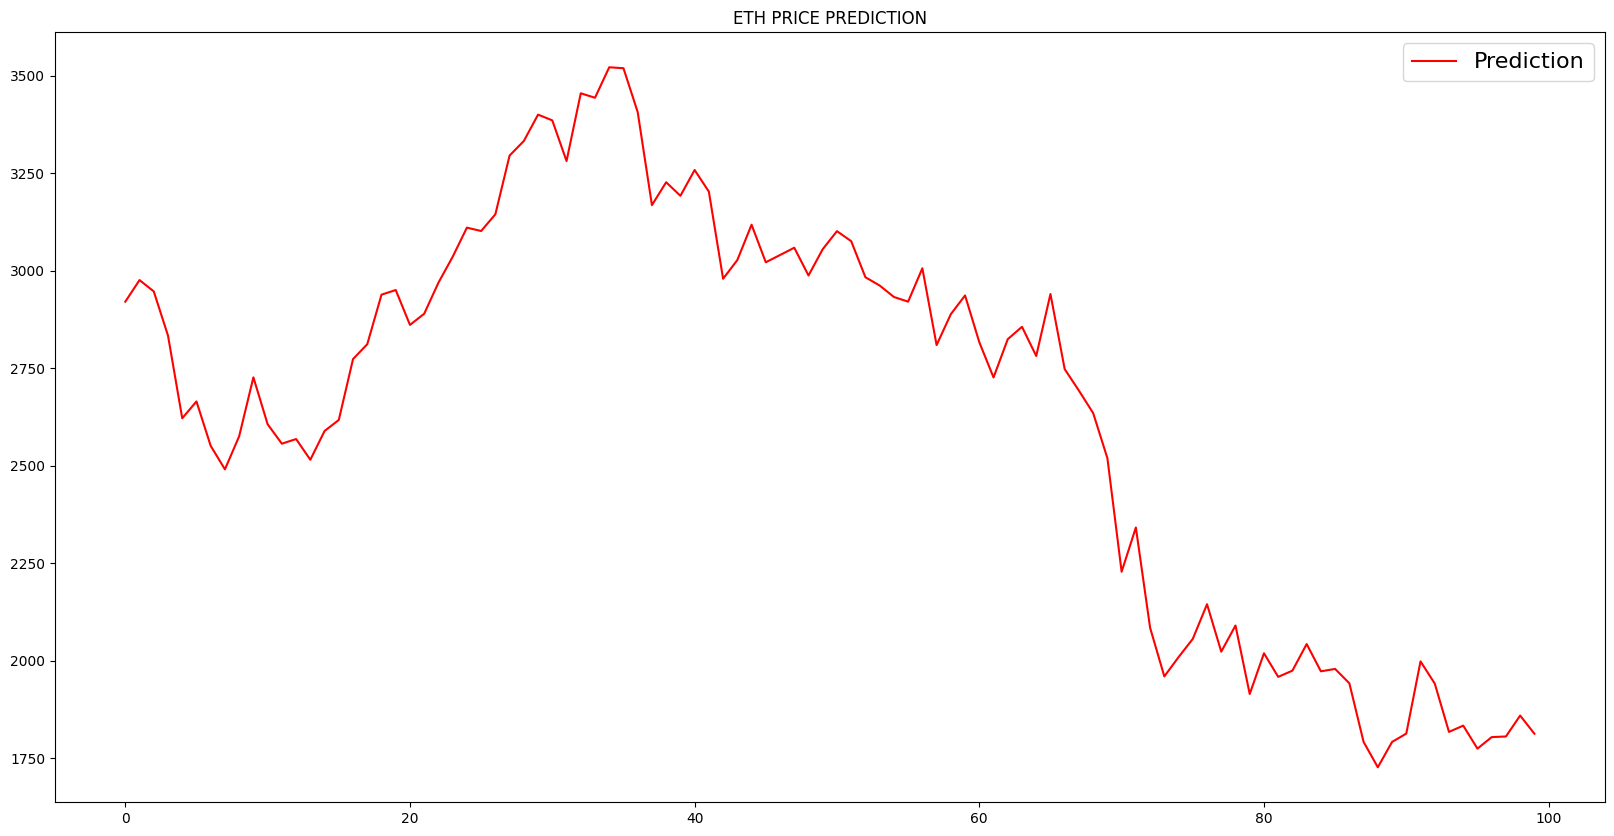

In [133]:
plt.figure(figsize=(20, 10))
# plt.plot(prediction, color='blue', label='Prediction')
plt.plot(y_test_transformed[:100], color='red', label='Prediction')
plt.title('ETH PRICE PREDICTION')
plt.legend(loc='best', fontsize=16)
plt.show()


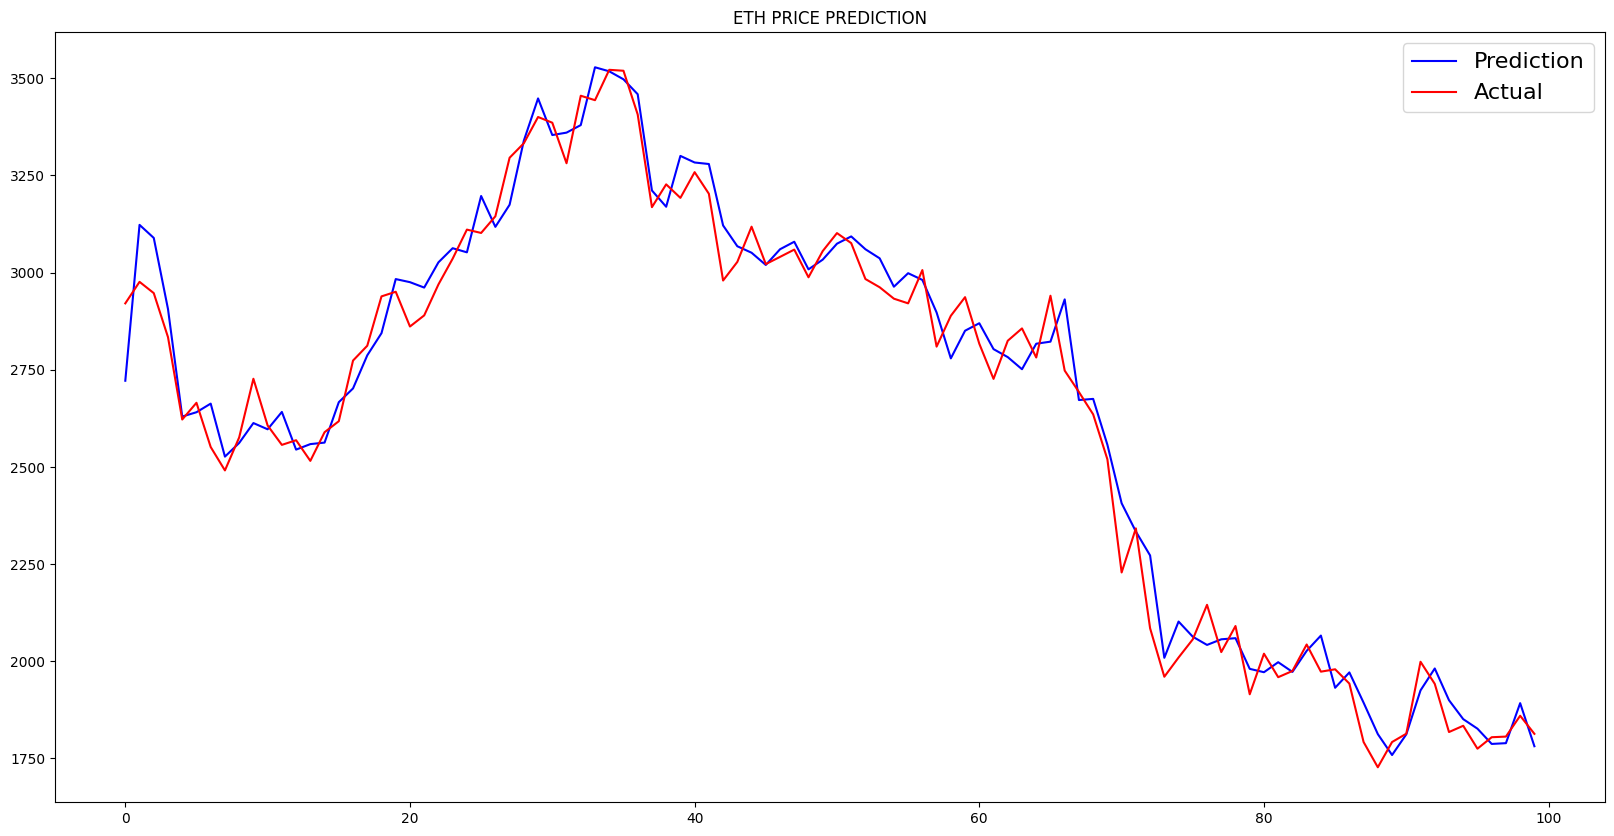

In [177]:
#Plot value in the first 100 days
plt.figure(figsize=(20, 10))
plt.plot(prediction[:100], color='blue', label='Prediction')
plt.plot(y_test_transformed[:100], color='red', label='Actual')
plt.title('ETH PRICE PREDICTION')
plt.legend(loc='best', fontsize=16)
plt.show()


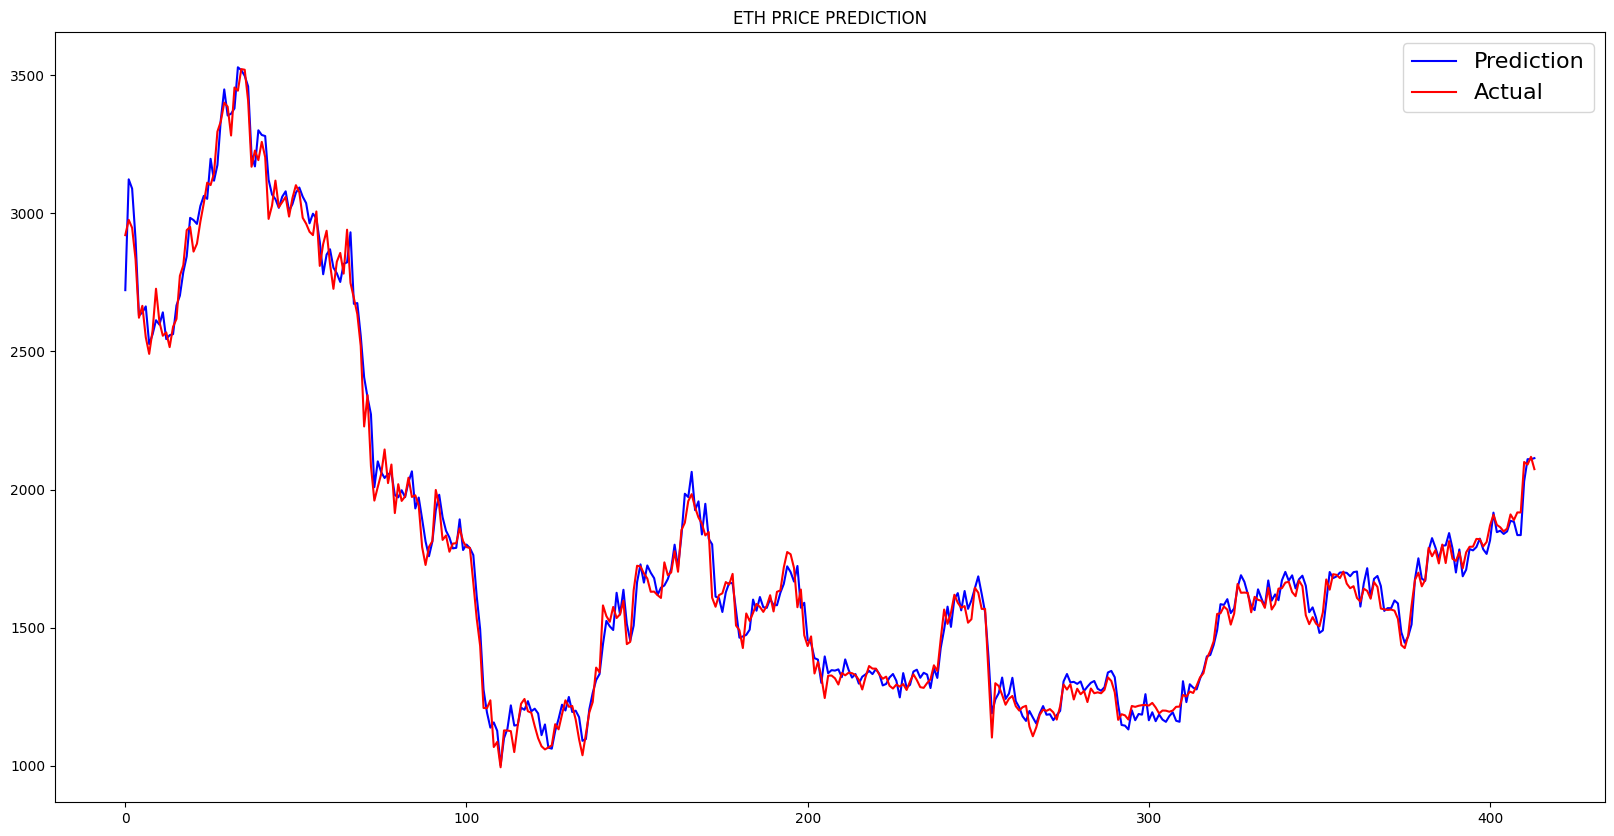

In [178]:
# Plot value 
plt.figure(figsize=(20, 10))
plt.plot(prediction, color='blue', label='Prediction')
plt.plot(y_test_transformed, color='red', label='Actual')
plt.title('ETH PRICE PREDICTION')
plt.legend(loc='best', fontsize=16)
plt.show()


### THE NEXT 10 DAYS


In [179]:
# Get the most recent date in the dataset
last_date = df.index[-1]

In [180]:
# Generate the next 10 dates
date_range = pd.date_range(start=last_date + timedelta(days=1), periods=100, freq='D')

In [181]:
# Prepare the input data for prediction
prediction_data = pd.DataFrame(index=date_range, columns=X.columns)
# Fill missing values with zeros
prediction_data.fillna(0, inplace=True)  

In [182]:
# Perform prediction
dprediction = xgb.DMatrix(
    prediction_data.values.reshape(prediction_data.shape[0], -1))
prediction = xgb_model.predict(dprediction)

In [183]:
# Combine the dates and predicted prices
result = pd.DataFrame({'Date': date_range, 'Price': prediction})


In [184]:
df.tail()

,Open,High,Low,Close,Volume ETH,Volume USDT
Date,,,,,,
2023-04-13,1889.86,1933.00,1852.65,1917.39,630844.4186,1.195664e+09
2023-04-14,2012.00,2128.76,2009.22,2099.99,896307.3934,1.877720e+09
2023-04-15,2099.99,2111.85,2071.13,2090.60,321823.7851,6.742609e+08
2023-04-16,2090.61,2141.54,2072.72,2118.67,319880.4393,6.730346e+08
2023-04-17,2118.66,2120.51,2056.25,2074.00,426972.7071,8.894333e+08


In [185]:
result

,Date,Price
0,2023-04-18,102.730812
1,2023-04-19,102.730812
2,2023-04-20,102.730812
3,2023-04-21,102.730812
4,2023-04-22,102.730812
...,...,...
95,2023-07-22,102.730812
96,2023-07-23,102.730812
97,2023-07-24,102.730812
98,2023-07-25,102.730812


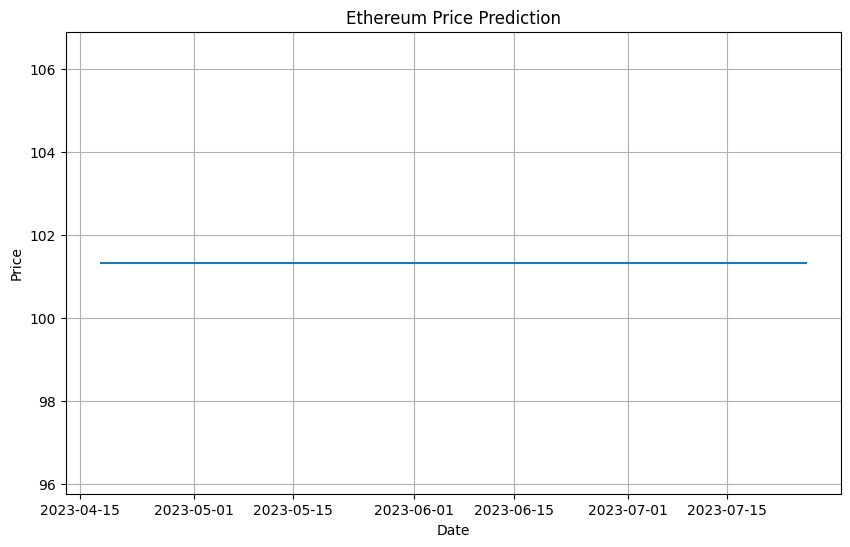

In [58]:
# Generate a plot of the predicted prices
plt.figure(figsize=(10, 6))
plt.plot(result['Date'], result['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Ethereum Price Prediction')
plt.grid(True)
plt.show()

### THE NEXT 30 DAYS (NEW CODE)

In [113]:
# Get the latest date in the dataset
latest_date = df.index[-1]

In [114]:
df.head()

,Open,High,Low,Close,Volume ETH,Volume USDT
Date,,,,,,
2017-08-17,301.13,312.18,298.00,302.00,7030.71034,2.154655e+06
2017-08-18,302.00,311.79,283.94,293.96,9537.84646,2.858947e+06
2017-08-19,293.31,299.90,278.00,290.91,2146.19773,6.200226e+05
2017-08-20,289.41,300.53,282.85,299.10,2510.13871,7.428479e+05
2017-08-21,299.10,346.52,294.60,323.29,5219.44542,1.689472e+06


In [115]:
# Create a DataFrame with dates for the next 30 days
prediction_dates = pd.date_range(latest_date, periods=30, freq='D')
prediction_data = pd.DataFrame(index=prediction_dates)


In [ ]:
# Merge the prediction dataset with the features from the last available date in the original dataset
latest_features = df.loc[latest_date][['open', 'high', 'low', 'close', 'volume']]
prediction_data = pd.concat([prediction_data] * len(latest_features), ignore_index=True)
prediction_data[['open', 'high', 'low', 'close', 'volume']] = latest_features.values
